# PENGUINS SIZE

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("penguins_size.csv")

In [4]:
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# 🔹Önce eksik satırları temizleyelim
df = df.dropna()

In [8]:
df.shape

(1000, 8)

In [13]:
y = pd.get_dummies(df["species"])  # (Örneğin: 'FEMALE' = 0, 'MALE' = 1)
x = df.drop("species", axis=1)  # 'sex' değişkenini bağımsız değişkenlerden çıkar
x = pd.get_dummies(x, drop_first=True)  # Kategorik değişkenleri sayısala çevir

In [14]:

print(df.columns)  

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


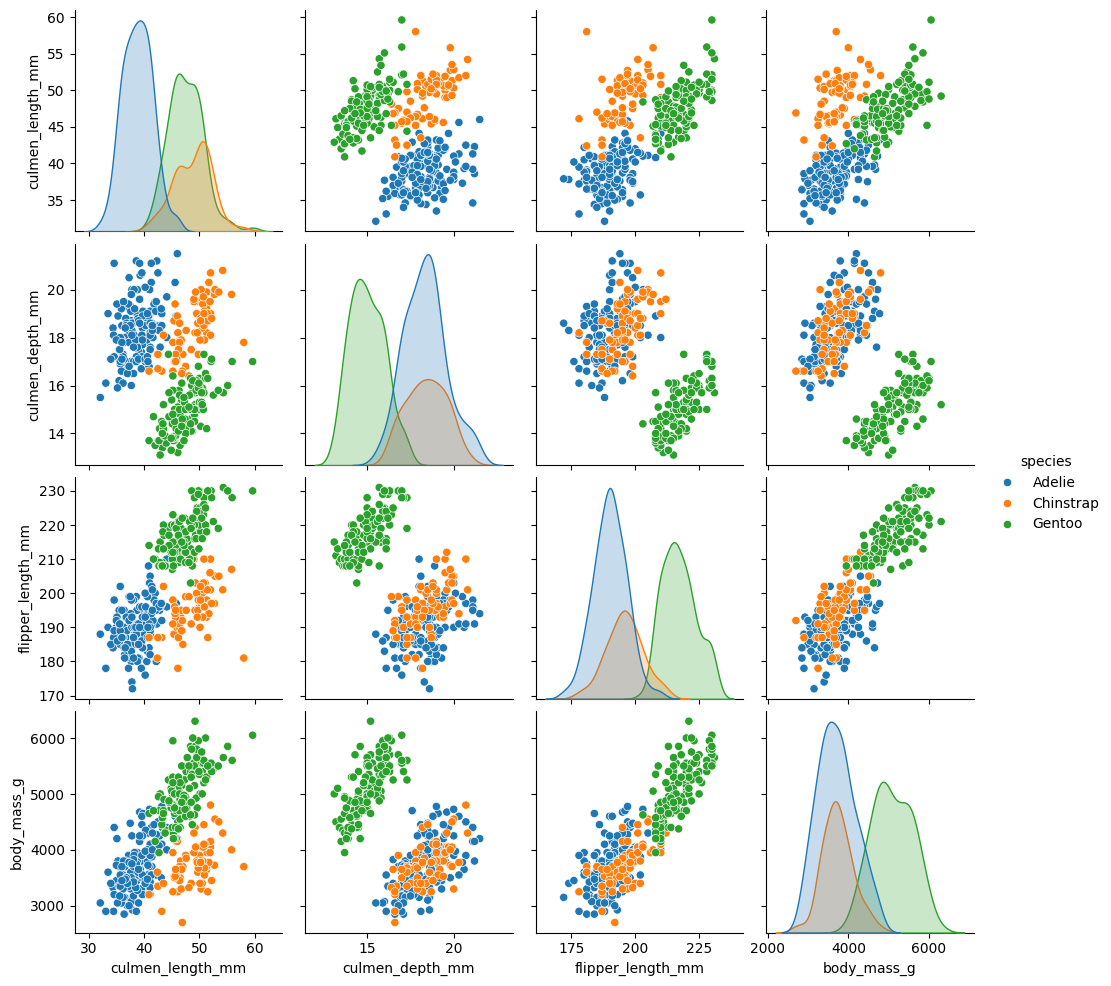

In [ ]:
sns.pairplot(df , hue="species")

<Axes: >

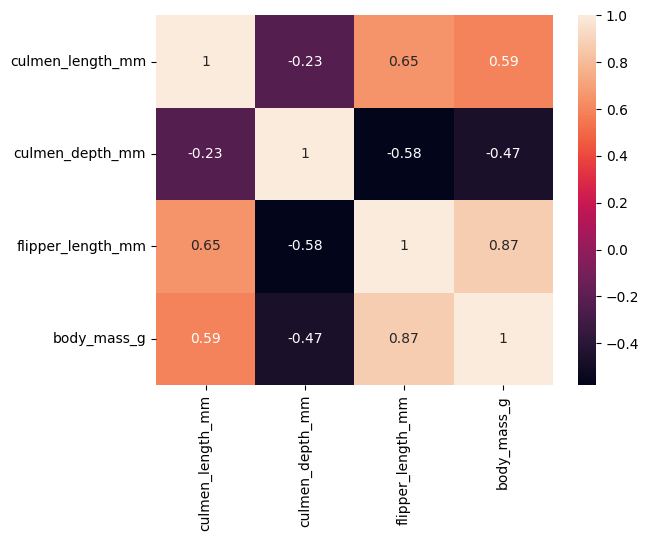

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# RANDOM FOREST

In [ ]:
y

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
338,False,False,True
340,False,False,True
341,False,False,True
342,False,False,True


* TRAİN TEST SPLİT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

* HİPER ORMAN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

* EĞER GRID SEARCH UYGULAMAK İSTERSEK

In [ ]:
'''

n_est = [5,6,7,8,9,10]
max_feat= [1,2,3,4]
bootstrap_sec = [True,False]
oob=[True , False]

parameters = {
    "n_estimators": n_est,
    "max_features": max_feat, 
    "bootstrap": bootstrap_sec,
    "oob_score": oob
}'''




'\n\nn_est = [5,6,7,8,9,10]\nmax_feat= [1,2,3,4]\nbootstrap_sec = [True,False]\noob=[True , False]\n\nparameters = {\n    "n_estimators": n_est,\n    "max_features": max_feat, \n    "bootstrap": bootstrap_sec,\n    "oob_score": oob\n}'

In [ ]:

'''
parameters={
    "n_estimators":n_est,
    "max_features":max_feat , 
    "bootstrap":bootstrap_sec,
    "oob_score":oob
    }'''


'\nparameters={\n    "n_estimators":n_est,\n    "max_features":max_feat , \n    "bootstrap":bootstrap_sec,\n    "oob_score":oob\n    }'

* RAND FOREST

In [ ]:
random = RandomForestClassifier()
#grid = GridSearchCV(random, parameters)
random.fit(X_train,y_train)


RandomForestClassifier()

* DEĞERLENDİRME

In [ ]:
pred = random.predict(X_test)

In [ ]:
from sklearn.metrics import  classification_report

In [ ]:
#print("Best Params:", grid.best_params_)
print("Classification Report:\n", classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00        32

   micro avg       0.99      0.97      0.98       101
   macro avg       0.99      0.97      0.98       101
weighted avg       0.99      0.97      0.98       101
 samples avg       0.97      0.97      0.97       101



C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# LOGISTIC REGR

In [ ]:

y = pd.get_dummies(df["species"])  
x = df.drop("species", axis=1)  
x = pd.get_dummies(x, drop_first=True)  


* TRAİN TEST SPLİT


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

* STANDART SCALER

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


* LOG REGR

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter=5000)

In [ ]:
log_model.fit(scaled_X_train, y_train.idxmax(axis=1))  # En büyük değeri alarak 1D hale getiriyoruz



LogisticRegression(max_iter=5000)

In [ ]:
predlog = log_model.predict(scaled_X_test)

* DEĞERLENDİRME

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Dummy kodlamadan geri dönüştürme
y_test_single = y_test.idxmax(axis=1)
# Classification Report
print("Classification Report:\n", classification_report(y_test_single, predlog))


Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        46
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       1.00      1.00      1.00        32

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

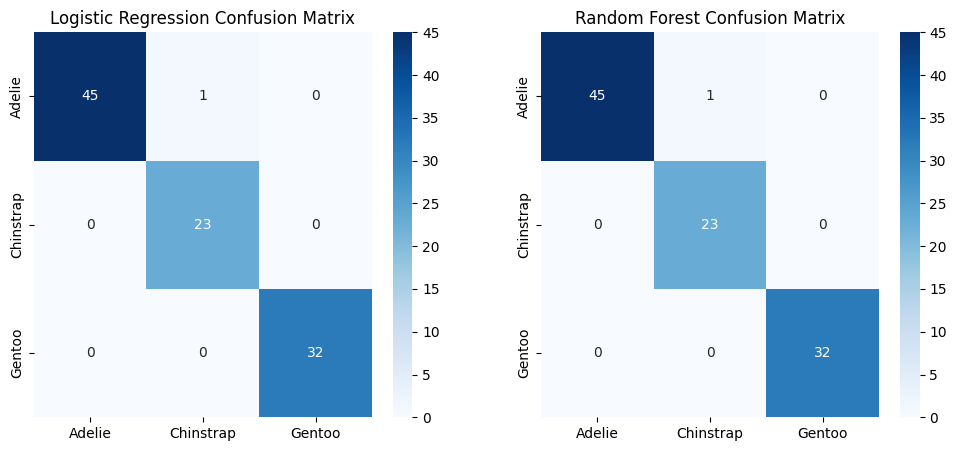

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Logistic Regression Confusion Matrix
log_cm = confusion_matrix(y_test.idxmax(axis=1), pred)
sns.heatmap(log_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")


#Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test.idxmax(axis=1), pred)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")